In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.rename(columns={"Annual Income (k$)": "income", "Spending Score (1-100)":"score"})

In [4]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
income        0
score         0
dtype: int64

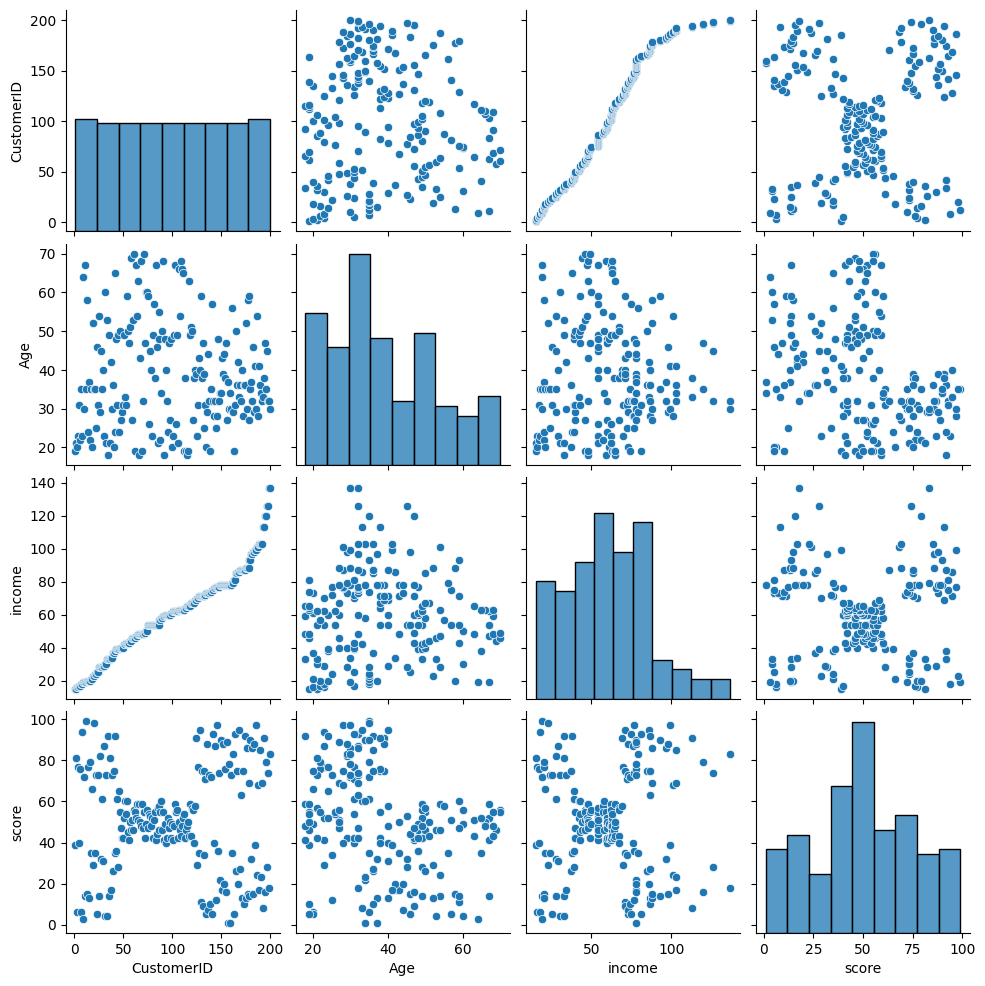

In [7]:
sns.pairplot(df)

<Axes: xlabel='income', ylabel='score'>

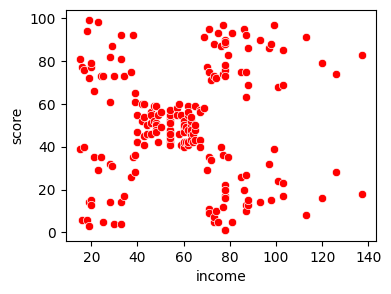

In [8]:
plt.figure(figsize=(4,3))
sns.scatterplot(x= df.income, y =df.score, color="r")

In [9]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df["Gender"]= df["Gender"].replace(["Male","Female"],[1,0])

C:\Users\ABDULLAH AL MASUM\AppData\Local\Temp\ipykernel_10540\1448490238.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"]= df["Gender"].replace(["Male","Female"],[1,0])


In [11]:
df.corr()

,CustomerID,Gender,Age,income,score
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
income,0.977548,0.056410,-0.012398,1.000000,0.009903
score,0.013835,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

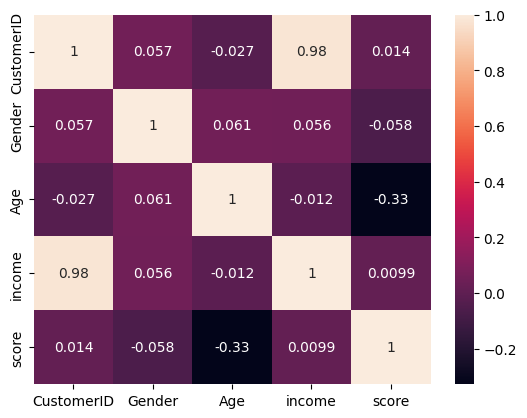

In [12]:
sns.heatmap(df.corr(), annot= True)

<Axes: xlabel='income', ylabel='Count'>

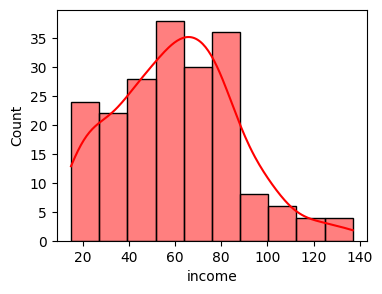

In [13]:
plt.figure(figsize=(4,3))
sns.histplot(x= df.income ,color="r", kde=True)

<Axes: xlabel='score', ylabel='Count'>

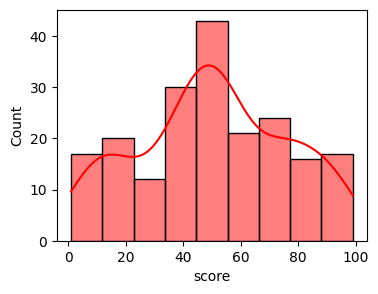

In [14]:
plt.figure(figsize=(4,3))
sns.histplot(x= df.score ,color="r", kde=True)

In [15]:
kmeans= KMeans()

In [16]:
model = kmeans.fit(df[["income", "score"]])

In [17]:
model

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [18]:
pred = model.predict(df[["income", "score"]])
pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 5, 1, 5, 1,
       0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 0, 1, 5, 1, 0, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 0, 1, 5, 1, 0, 1, 5, 1, 0, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 6, 0, 6, 7, 6, 0, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6], dtype=int32)

In [19]:
df["pred_clus"]= pred

In [20]:
df.head(15)

,CustomerID,Gender,Age,income,score,pred_clus
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3
5,6,0,22,17,76,4
6,7,0,35,18,6,3
7,8,0,23,18,94,4
8,9,1,64,19,3,3
9,10,0,30,19,72,4


In [21]:
cluster_1= model.cluster_centers_

In [22]:
cluster_1

array([[ 78.91666667,  34.66666667],
       [ 78.03571429,  81.89285714],
       [ 54.28947368,  50.25      ],
       [ 26.30434783,  20.91304348],
       [ 25.72727273,  79.36363636],
       [ 79.6       ,  11.3       ],
       [108.18181818,  82.72727273],
       [112.625     ,  18.625     ]])

In [23]:
df0= df[df["pred_clus"]==0]

In [24]:
df1= df[df["pred_clus"]==1]
df2= df[df["pred_clus"]==2]
df3= df[df["pred_clus"]==3]
df4= df[df["pred_clus"]==4]
df5= df[df["pred_clus"]==5]
df6= df[df["pred_clus"]==6]
df7= df[df["pred_clus"]==7]

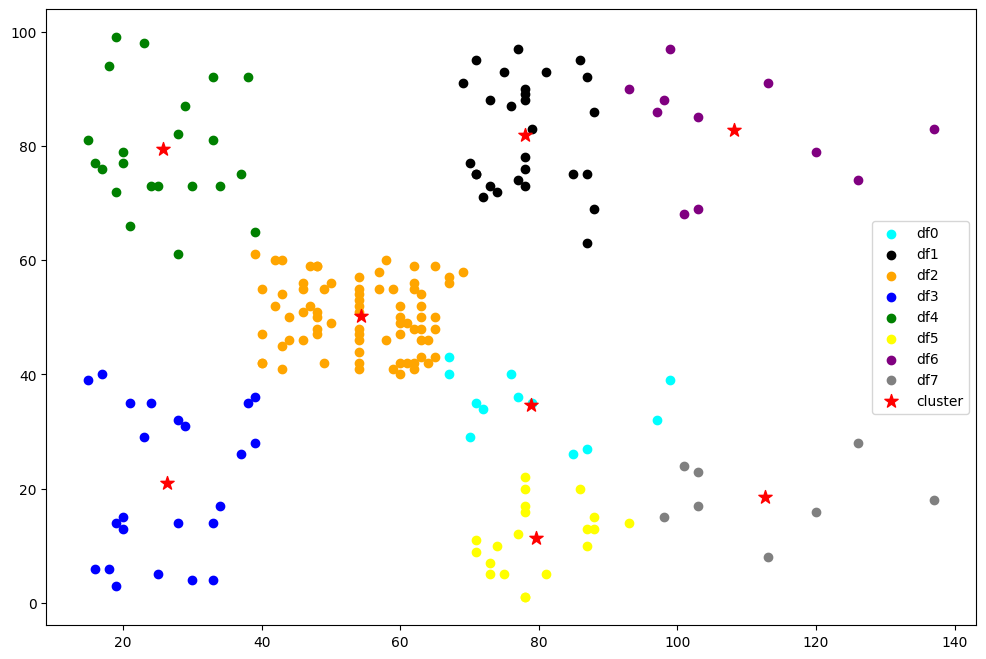

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(df0.income, df0.score, color="cyan", label ="df0")
plt.scatter(df1.income, df1.score, color="black", label ="df1")
plt.scatter(df2.income, df2.score, color="orange", label ="df2")
plt.scatter(df3.income, df3.score, color="blue", label ="df3")
plt.scatter(df4.income, df4.score, color="green", label ="df4")
plt.scatter(df5.income, df5.score, color="yellow", label ="df5")
plt.scatter(df6.income, df6.score, color="purple", label ="df6")
plt.scatter(df7.income, df7.score, color="gray", label ="df7")

plt.scatter(cluster_1[:,0], cluster_1[:,1], color="red", label="cluster", marker="*", s= 100)
plt.legend()

In [26]:
# elbow method
wcss =[]
clus= range(2,15)

for k in clus:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df[["income", "score"]])
    wcss.append(kmean.inertia_)

In [27]:
wcss

[183714.08082173267,
 106348.37306211118,
 73679.78903948836,
 66674.36000494969,
 38788.45862332112,
 31248.853151807474,
 29204.099463744387,
 22143.222100767453,
 19672.07284901432,
 18535.759673928223,
 15970.297433518863,
 15195.642893739194,
 14155.782029478458]

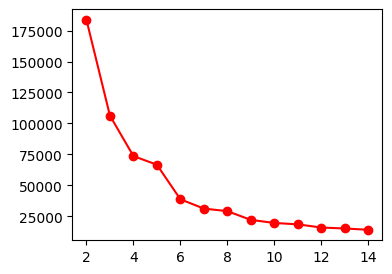

In [28]:
plt.figure(figsize=(4,3))
plt.plot(clus,wcss, color ="r", marker="o")

In [29]:
#kneed
!pip install kneed

In [30]:
from kneed import KneeLocator
knl = KneeLocator(clus, wcss, curve="convex", direction="decreasing")

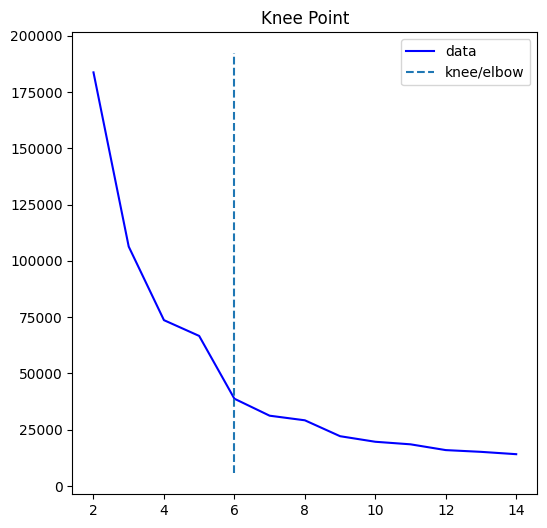

In [31]:
knl.plot_knee()

In [32]:
final_k = KMeans(n_clusters=5)

In [33]:
final_model = final_k.fit(df[["income", "score"]])

In [34]:
df.head()

,CustomerID,Gender,Age,income,score,pred_clus
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


In [35]:
pred1= final_model.predict(df[["income", "score"]])

In [36]:
df["actual_pred"] = pred1
df.head()

,CustomerID,Gender,Age,income,score,pred_clus,actual_pred
0,1,1,19,15,39,3,3
1,2,1,21,15,81,4,2
2,3,0,20,16,6,3,3
3,4,0,23,16,77,4,2
4,5,0,31,17,40,3,3


In [37]:
center2 = final_model.cluster_centers_
center2

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [38]:
df["actual_pred"].value_counts()

actual_pred
1    81
0    39
4    35
3    23
2    22
Name: count, dtype: int64

In [39]:
df0 = df[df["actual_pred"]==0]
df1 = df[df["actual_pred"]==1]
df2 = df[df["actual_pred"]==2]
df3 = df[df["actual_pred"]==3]
df4 = df[df["actual_pred"]==4]

In [56]:
df0.head(10)

,CustomerID,Gender,Age,income,score,pred_clus,actual_pred
123,124,1,39,69,91,1,0
125,126,0,31,70,77,1,0
127,128,1,40,71,95,1,0
129,130,1,38,71,75,1,0
131,132,1,39,71,75,1,0
133,134,0,31,72,71,1,0
135,136,0,29,73,88,1,0
137,138,1,32,73,73,1,0
139,140,0,35,74,72,1,0
141,142,1,32,75,93,1,0


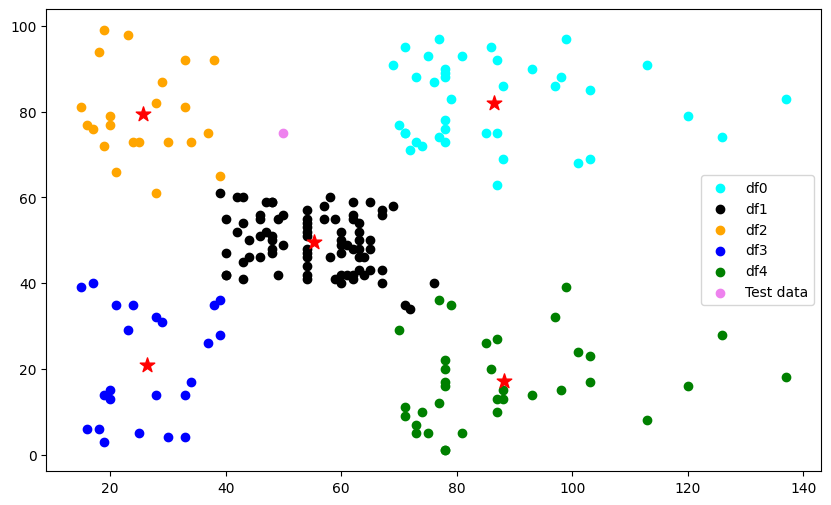

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(df0.income, df0.score, color="cyan", label ="df0")
plt.scatter(df1.income, df1.score, color="black", label ="df1")
plt.scatter(df2.income, df2.score, color="orange", label ="df2")
plt.scatter(df3.income, df3.score, color="blue", label ="df3")
plt.scatter(df4.income, df4.score, color="green", label ="df4")
plt.scatter(50,75, color= "violet", label= "Test data")

plt.scatter(center2[:,0], center2[:,1], color = "red", s= 120, marker="*")
plt.legend()

In [42]:
center2[:,0]

array([86.53846154, 55.2962963 , 25.72727273, 26.30434783, 88.2       ])

In [43]:
center2[:,1]

array([82.12820513, 49.51851852, 79.36363636, 20.91304348, 17.11428571])

In [44]:
center2

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [45]:
final_model.predict([[50,75]])

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


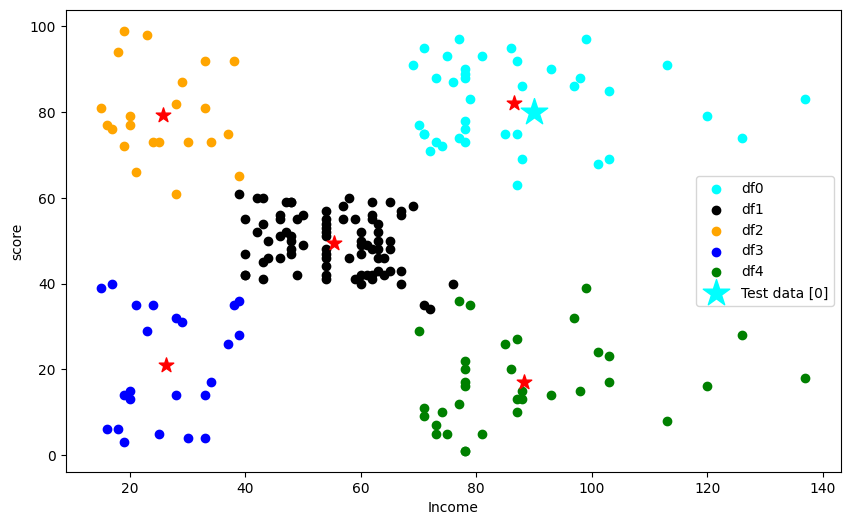

In [ ]:
income = int(input("Enter income : "))
score = int(input("Enter score : "))
color = ["cyan","black","orange","blue","green"]

clus_no = final_model.predict([[income, score]])
color_no = color[clus_no[0]]

plt.figure(figsize=(10,6))
plt.scatter(df0.income, df0.score, color="cyan", label ="df0")
plt.scatter(df1.income, df1.score, color="black", label ="df1")
plt.scatter(df2.income, df2.score, color="orange", label ="df2")
plt.scatter(df3.income, df3.score, color="blue", label ="df3")
plt.scatter(df4.income, df4.score, color="green", label ="df4")
plt.scatter(income, score, color= color_no, label= f"Test data {clus_no}", marker="*", s = 400)
plt.xlabel("Income")
plt.ylabel("score")

plt.scatter(center2[:,0], center2[:,1], color = "red", s= 120, marker="*")
plt.legend()
plt.show()

In [55]:
clus_no[0]

np.int32(0)